<a href="https://colab.research.google.com/github/sim017/Image_classification/blob/master/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()



170500096/170498071 [==============================] - 10s 0us/step


In [3]:
train_images = train_images/255.0
test_images = test_images/255.0
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
model  = tf.keras.models.Sequential([
                                     layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)),
                                     layers.Conv2D(64,(3,3),padding='same',activation='relu'),
                                     layers.MaxPooling2D(pool_size=(2,2)),
                                     layers.Conv2D(128,(3,3),padding='same',activation='relu'),
                                     layers.MaxPooling2D(pool_size=(2,2)),
                                     layers.Dropout(0.10),
                                     layers.Flatten(),
                                     layers.Dense(512,activation='relu'),
                                     layers.Dropout(0.10),
                                     layers.Dense(256,activation='relu'),
                                     layers.Dense(10)

])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [5]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [6]:
training_hist = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 383s 245ms/step - loss: 1.3118 - accuracy: 0.5245 - val_loss: 1.0688 - val_accuracy: 0.6183
Epoch 2/10
1563/1563 [==============================] - 386s 247ms/step - loss: 0.8583 - accuracy: 0.6972 - val_loss: 0.8072 - val_accuracy: 0.7197
Epoch 3/10
1563/1563 [==============================] - 386s 247ms/step - loss: 0.6730 - accuracy: 0.7629 - val_loss: 0.7598 - val_accuracy: 0.7383
Epoch 4/10
1563/1563 [==============================] - 393s 251ms/step - loss: 0.5267 - accuracy: 0.8156 - val_loss: 0.7758 - val_accuracy: 0.7480
Epoch 5/10
1563/1563 [==============================] - 389s 249ms/step - loss: 0.4159 - accuracy: 0.8531 - val_loss: 0.7811 - val_accuracy: 0.7504
Epoch 6/10
1563/1563 [==============================] - 398s 254ms/step - loss: 0.3229 - accuracy: 0.8858 - val_loss: 0.8227 - val_accuracy: 0.7489
Epoch 7/10
1563/1563 [==============================] - 396s 253ms/step - loss: 0.2557 - accuracy: 0.9105 - val_

313/313 - 18s - loss: 1.0830 - accuracy: 0.7478


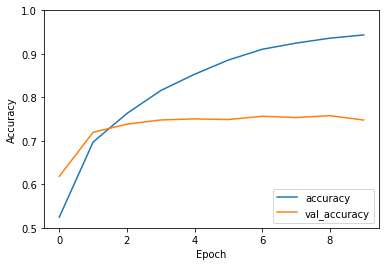

In [8]:
plt.plot(training_hist.history['accuracy'], label='accuracy')
plt.plot(training_hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)